In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import datetime as dtz
from sklearn.preprocessing import Normalizer,LabelEncoder

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Density
from scipy.stats import gamma

# Machine learning toolkit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

# Cross Validation(k-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Make pandas display in scientific format for all continuous computing
pd.options.display.float_format = '{:.0f}'.format

# Set panda option to display row and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',120)

In [2]:
Compile_date = dtz.datetime.now()
print('The last date we try to compile this code at :',Compile_date)

The last date we try to compile this code at : 2019-12-06 14:01:02.008624


In [3]:
print('We input the Sales Data')
SBU = pd.read_csv('./DATA/RAW.csv', delimiter = ';')
print('_'*80)

#Shape of SBU Data
print("Number of Sales Data's Column is",SBU.shape[1])
print("Number of Sales Data's Row is",SBU.shape[0])
#Print Column Name
print("Name of Sales Data's Columns are :")
display(SBU.dtypes)

We input the Sales Data
________________________________________________________________________________
Number of Sales Data's Column is 5
Number of Sales Data's Row is 102239
Name of Sales Data's Columns are :


No           int64
Period      object
AC         float64
Zone        object
Monthly    float64
dtype: object

In [4]:
##Customize the Date attribute
from datetime import datetime

def att_time(df, att, dlt) :
    new = df[att].str.split(dlt, n = 1, expand = True) #we split the period attribute into 2 columns by the space
    #display(new.head(3))
    df['Month'] = new[1]
    df['Year'] = new[0]
    #display(df.head(3)) # We got 2 columns with the month and year

    s1 = df['Month'].tolist()
    s2 = df['Year'].tolist()

    s3 = [] #make a container for date parsing
    for i in range(len(s1)) :
        s4 = '{}-{}-01'.format(s2[i], s1[i])
        s4 = datetime.strptime(s4,'%Y-%m-%d').date() #make it type date by parse the date format in string type
        s3.append(s4) #add the result into s3 list
    
    df['Date'] = s3 #make it part of Data attribute
    df.drop([att], axis = 1, inplace=True) #try to remove att attribute in data
    df.set_index('Date',inplace=True) #Set date attribute as the index
    #df.reset_index(inplace=True)
    display(df.head(3))
    
att_time(SBU, att='Period', dlt=' ')
SBU.rename(columns={'Monthly':'Num_Sales'}, inplace=True)
SBU.drop(['No'], axis=1, inplace=True)

,No,AC,Zone,Monthly,Month,Year
Date,,,,,,
2016-01-01,1,1011000000000,Zone 01,1284294,01,2016
2016-02-01,2,1011000000000,Zone 01,1639863,02,2016
2016-03-01,3,1011000000000,Zone 01,1,03,2016


In [5]:
def overview(df) :
    print('This is the describe for data continuous :\n')
    print(df.describe())
    print('_'*80+'\n')
    print('This is the describe for data Object :\n')
    print(df.describe(include='O'))
    print('_'*80+'\n')
    print('This is head of data :\n')
    print(df.head(4))
    print('_'*80+'\n')
    print('This is type of data in each columns :\n')
    print(df.dtypes)
    print('_'*80+'\n')    
    print('This is number of NaN in data :\n')
    print(df.isna().sum())

overview(SBU)

This is the describe for data continuous :

                 AC  Num_Sales
count        102239     102239
mean  1011326307378    5724675
std       270408538   61125496
min   1011000000000          0
25%   1011010000000          0
50%   1011400000000          1
75%   1011600000000     472468
max   1012000000000 4695129768
________________________________________________________________________________

This is the describe for data Object :

            Zone   Month    Year
count     102239  102239  102239
unique        12      12       4
top     National      12    2019
freq       15482    8938   28904
________________________________________________________________________________

This is head of data :

                      AC     Zone  Num_Sales Month  Year
Date                                                    
2016-01-01 1011000000000  Zone 01    1284294    01  2016
2016-02-01 1011000000000  Zone 01    1639863    02  2016
2016-03-01 1011000000000  Zone 01          1    03  2016

In [6]:
fig = plt.figure(figsize = (15,12))
SBUstr = SBU.select_dtypes(include=['object'])
strSBU = SBUstr.columns.values.tolist()[40:50]
for i, feature in enumerate(strSBU):
    ax = fig.add_subplot(5, 2, i+1)
    SBU.groupby('Zone')[feature].count().plot(kind='bar', color = '#00A0A0')
    ax.set_title('%s'%(feature), fontsize = 14)
    
fig.tight_layout()
plt.show()

SBU.head(3)

<Figure size 1080x864 with 0 Axes>

,AC,Zone,Num_Sales,Month,Year
Date,,,,,
2016-01-01,1011000000000,Zone 01,1284294,01,2016
2016-02-01,1011000000000,Zone 01,1639863,02,2016
2016-03-01,1011000000000,Zone 01,1,03,2016


In [7]:
converty = {'AC' : 'str',
           'Zone' : 'str',
           'Num_Sales' : 'float',
           'Month' : 'str',
           'Year' : 'str'}
SBU_X = SBU.astype(converty) 
print(SBU_X.dtypes)

AC            object
Zone          object
Num_Sales    float64
Month         object
Year          object
dtype: object


In [8]:
SBU_X = SBU_X[(SBU_X['Zone']== 'National')].sort_index()
SBU_X.drop(['Zone'], axis=1, inplace=True)

In [9]:
SBU_X['AC'] = SBU_X['AC'].map({
'1011000000000.0' : 1,
'1011010000000.0' : 2,
'1011100000000.0' : 3,
'1011200000000.0' : 4,
'1011300000000.0' : 5,
'1011400000000.0' : 6,
'1011600000000.0' : 7,
'1011700000000.0' : 8,
'1011810000000.0' : 9,
'1011500000000.0' : 10,
'1011900000000.0' : 11,
'1012000000000.0' : 12
}).astype(int)
SBU_X['AC'].value_counts()

7     6327
1     2387
6     2289
3     1281
8     1026
9      839
2      478
4      440
5      226
10     135
11      30
12      24
Name: AC, dtype: int64

SBU_X['Zone'] = SBU_X['Zone'].map({
'Zone 01' : 1,
'Zone 02A' : 2,
'Zone 02B' : 3,
'Zone 03' : 4,
'Zone 04' : 5,
'Zone 05' : 6,
'Zone 06' : 7,
'Zone 07' : 8,
'Zone 08' : 9,
'Zone 02 AFH' : 10,
'Zone 09' : 11,
'National' : 12
}).astype(int)
SBU_X['Zone'].value_counts()

In [10]:
SBU_X['Month'] = SBU_X['Month'].map({
'01' : 1,
'02' : 2,
'03' : 3,
'04' : 4,
'05' : 5,
'06' : 6,
'07' : 7,
'08' : 8,
'09' : 9,
'10' : 10,
'11' : 11,
'12' : 12
}).astype(int)
SBU_X['Month'].value_counts()

12    1337
11    1330
10    1329
9     1320
8     1306
7     1293
6     1287
5     1274
4     1269
3     1255
2     1245
1     1237
Name: Month, dtype: int64

In [11]:
SBU_X['Year'] = SBU_X['Year'].map({
'2016' : 1,
'2017' : 2,
'2018' : 3,
'2019' : 4
}).astype(int)
SBU_X['Year'].value_counts()

4    4268
3    4090
2    3793
1    3331
Name: Year, dtype: int64

In [12]:
#Initial Setting Array from Dataframe
Yrfe = SBU_X['Num_Sales'].values.copy()
SBU_X2 = SBU_X.drop(['Num_Sales'], axis = 1).copy()
Xrfe = SBU_X2.values

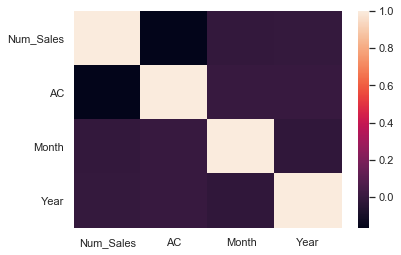

In [13]:
corr = SBU_X[['Num_Sales', 'AC', 'Month', 'Year']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

# Prediction Model
for Supervised Learning plus Classification and Regression, our choice of models to are:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network

In [14]:
#Yxx = pd.cut(Y,10)
#Yxx.value_counts()

In [15]:
from sklearn.model_selection import train_test_split

Y = SBU_X['Num_Sales'].copy()
X = SBU_X.drop(['Num_Sales'], axis = 1).copy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, test_size = 0.4)
Y_train = Y_train.astype('int').copy()
Y_test = Y_test.astype('int').copy()

features_train = X_train.copy()
label_train = Y_train.copy()
features_test = X_test.copy()
label_test = Y_test.copy()

print('Dimension of Trainning Data of Features : {}'.format(X_train.shape))
print('Dimension of Test Data of Features : {}'.format(X_test.shape))

Dimension of Trainning Data of Features : (9289, 3)
Dimension of Test Data of Features : (6193, 3)


In [16]:
def MSE(ytests,ypredicts) :
    ytlist = ytests.to_list()
    yplist = ypredicts.tolist()
    holdz = []
    for i in range(len(ytlist)):
        temp = (ytlist[i] - yplist[i])**2
        holdz.append(temp)
    mses = sum(holdz)/len(ytlist)
    Variance = np.var(ypredicts)
    Biases = np.sqrt(mses - Variance)
    sentence = 'The MSE is {:0.3f} \nThe Variance is {:0.3f} \nThe Biased is {:0.3f}'
    print(sentence.format(mses, Variance, Biases))
    return [mses, Variance, Biases]

In [17]:
# Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs')
#logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,Y_train)

pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)
pred_logistic = pred_test.copy()

accuracy_train = accuracy_score(pred_train,Y_train)
accuracy_test = accuracy_score(pred_test,Y_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),logreg.predict_proba(X_train)[:,1],pos_label=1)
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),logreg.predict_proba(X_test)[:,1],pos_label=1)
auc_test = metrics.auc(fpr,tpr)

acc_log2 = round(accuracy_train*100,2)
print('Accuracy of Train Data =',acc_log2,'%.')
print('Accuracy of Test Data =',round(accuracy_test*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_train*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_test*100,2),'%.')
print('Accuracy of Training X and Y Data =',acc_log,'%.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Train Data = 40.88 %.
Accuracy of Test Data = 40.16 %.
AUC coeficient of Train Data = 56.54 %.
AUC coeficient of Test Data = 66.09 %.
Accuracy of Training X and Y Data = 40.88 %.


In [21]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix test for logistic regression')
Conf_Logtrain = confusion_matrix(Y_train, pred_train)
display(Conf_Logtrain)
print('Cross Tabulation for test data in logistic regression')
display(pd.crosstab(Y_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for logistic regression')
Y_tests = Y_test.astype('int')
Conf_Logtest = confusion_matrix(Y_tests, pred_test)
display(Conf_Logtest)
print('Cross Tabulation for test data in logistic regression')
display(pd.crosstab(Y_tests,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for logistic regression


array([[   0,   16,    0, ...,    0,    0,    0],
       [   0, 3797,    0, ...,    0,    0,    0],
       [   0,   24,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

Cross Tabulation for test data in logistic regression


""


______________________________________________________________________

Confusion Matrix test for logistic regression


array([[   0,    6,    0, ...,    0,    0,    0],
       [   0, 2487,    0, ...,    0,    0,    0],
       [   0,   22,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

Cross Tabulation for test data in logistic regression


""


In [23]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_train)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_LOG = MSE(Y_test,pred_test)

Variance and Biased for Train Prediction
The MSE is 15430283936876096.000 
The Variance is 0.000 
The Biased is 124218693.991
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 12057285451630762.000 
The Variance is 0.000 
The Biased is 109805671.309


In [24]:
pd.options.display.float_format = '{:.2f}'.format
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Year,0.37
1,Month,0.01
0,AC,-1.55


## Random Forest

In [25]:
RFc = RandomForestClassifier()
RFc.fit(X_train,Y_train)

pred_trainRF = RFc.predict(X_train)
pred_testRF = RFc.predict(X_test)

accuracy_trainRF = accuracy_score(pred_trainRF,Y_train)
accuracy_testRF = accuracy_score(pred_testRF,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),RFc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainRF = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),RFc.predict_proba(X_test)[:,1],pos_label=1)
auc_testRF = metrics.auc(fpr,tpr)

acc_RF = round(accuracy_trainRF*100,2)
print('Accuracy of Train Data =',acc_RF,'%.')
print('Accuracy of Test Data =',round(accuracy_testRF*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainRF*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testRF*100,2),'%.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Train Data = 41.47 %.
Accuracy of Test Data = 38.41 %.
AUC coeficient of Train Data = 54.85 %.
AUC coeficient of Test Data = 58.79 %.


In [27]:
print('Confusion Matrix test for Random Forest')
display(confusion_matrix(Y_train, pred_trainRF))
print('Cross Tabulation for test data in Random Forest')
display(pd.crosstab(Y_train,pd.Series(pred_trainRF),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Random Forest')
display(confusion_matrix(Y_test, pred_testRF))
print('Cross Tabulation for test data in Random Forest')
display(pd.crosstab(Y_test,pd.Series(pred_testRF),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Random Forest


array([[   0,   16,    0, ...,    0,    0,    0],
       [   0, 3746,    0, ...,    0,    0,    0],
       [   0,   24,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

Cross Tabulation for test data in Random Forest


""


______________________________________________________________________

Confusion Matrix test for Random Forest


array([[   0,    6,    0, ...,    0,    0,    0],
       [   0, 2379,    0, ...,    0,    0,    0],
       [   0,   21,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

Cross Tabulation for test data in Random Forest


""


In [28]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainRF)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_RF = MSE(Y_test,pred_testRF)

Variance and Biased for Train Prediction
The MSE is 16761240775637402.000 
The Variance is 2278355611598262.500 
The Biased is 120344859.317
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 14135609105879394.000 
The Variance is 2605070605890684.500 
The Biased is 107380345.036


In [29]:
from sklearn.neural_network import MLPClassifier
NNc = MLPClassifier()

NNc.fit(X_train,Y_train)

pred_trainNN = NNc.predict(X_train)
pred_testNN = NNc.predict(X_test)

accuracy_trainNN = accuracy_score(pred_trainNN,Y_train)
accuracy_testNN = accuracy_score(pred_testNN,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),NNc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainNN = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),NNc.predict_proba(X_test)[:,1],pos_label=1)
auc_testNN = metrics.auc(fpr,tpr)

acc_NN = round(accuracy_trainNN*100,2)
print('Accuracy of Train Data =',acc_NN,'%.')
print('Accuracy of Test Data =',round(accuracy_testNN*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainNN*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testNN*100,2),'%.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy of Train Data = 41.08 %.
Accuracy of Test Data = 39.27 %.
AUC coeficient of Train Data = 59.02 %.
AUC coeficient of Test Data = 59.7 %.


In [30]:
print('Confusion Matrix test for Neural Network')
display(confusion_matrix(Y_train, pred_trainNN))
print('Cross Tabulation for test data in Neural Network')
display(pd.crosstab(Y_train,pd.Series(pred_trainNN),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Neural Network')
display(confusion_matrix(Y_test, pred_testNN))
print('Cross Tabulation for test data in Neural Network')
display(pd.crosstab(Y_test,pd.Series(pred_testNN),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Neural Network


array([[   0,   16,    0, ...,    0,    0,    0],
       [   0, 3729,    0, ...,    0,    0,    0],
       [   0,   24,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

Cross Tabulation for test data in Neural Network


""


______________________________________________________________________

Confusion Matrix test for Neural Network


array([[   0,    6,    0, ...,    0,    0,    0],
       [   0, 2432,    0, ...,    0,    0,    0],
       [   0,   22,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

Cross Tabulation for test data in Neural Network


""


In [31]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainNN)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_NN = MSE(Y_test,pred_testNN)

Variance and Biased for Train Prediction
The MSE is 16130946681906846.000 
The Variance is 1287925758161655.500 
The Biased is 121831937.208
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 13443681294503460.000 
The Variance is 1592093816006711.250 
The Biased is 108864996.571


In [32]:
from sklearn.naive_bayes import GaussianNB 
NByc = GaussianNB()

NByc.fit(X_train,Y_train)

pred_trainNBy = NByc.predict(X_train)
pred_testNBy = NByc.predict(X_test)

accuracy_trainNBy = accuracy_score(pred_trainNBy,Y_train)
accuracy_testNBy = accuracy_score(pred_testNBy,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),NByc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainNBy = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),NByc.predict_proba(X_test)[:,1],pos_label=1)
auc_testNBy = metrics.auc(fpr,tpr)

acc_NBy = round(accuracy_trainNBy*100,2)
print('Accuracy of Train Data =',acc_NBy,'%.')
print('Accuracy of Test Data =',round(accuracy_testNBy*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainNBy*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testNBy*100,2),'%.')

Accuracy of Train Data = 6.59 %.
Accuracy of Test Data = 2.55 %.
AUC coeficient of Train Data = 43.71 %.
AUC coeficient of Test Data = 48.17 %.


In [33]:
print('Confusion Matrix test for Naive Bayes')
display(confusion_matrix(Y_train, pred_trainNBy))
print('Cross Tabulation for test data in Naive Bayes')
display(pd.crosstab(Y_train,pd.Series(pred_trainNBy),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Naive Bayes')
display(confusion_matrix(Y_test, pred_testNBy))
print('Cross Tabulation for test data in Naive Bayes')
display(pd.crosstab(Y_test,pd.Series(pred_testNBy),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Naive Bayes


array([[  0,   0,   0, ...,   0,   0,   0],
       [ 94, 240,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

Cross Tabulation for test data in Naive Bayes


""


______________________________________________________________________

Confusion Matrix test for Naive Bayes


array([[  0,   0,   0, ...,   0,   0,   0],
       [ 71, 158,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

Cross Tabulation for test data in Naive Bayes


""


In [34]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainNBy)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_NBy = MSE(Y_test,pred_testNBy)

Variance and Biased for Train Prediction
The MSE is 62092652007708184.000 
The Variance is 46222321393514816.000 
The Biased is 125977500.428
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 64932475486655152.000 
The Variance is 52300074933041416.000 
The Biased is 112393952.478


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
GBc = GradientBoostingClassifier()

GBc.fit(X_train,Y_train)

pred_trainGB = GBc.predict(X_train)
pred_testGB = GBc.predict(X_test)

accuracy_trainGB = accuracy_score(pred_trainGB,Y_train)
accuracy_testGB = accuracy_score(pred_testGB,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),GBc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainGB = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),GBc.predict_proba(X_test)[:,1],pos_label=1)
auc_testGB = metrics.auc(fpr,tpr)

acc_GB = round(accuracy_trainGB*100,2)
print('Accuracy of Train Data =',acc_GB,'%.')
print('Accuracy of Test Data =',round(accuracy_testGB*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainGB*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testGB*100,2),'%.')

KeyboardInterrupt: 

In [ ]:
print('Confusion Matrix test for Gradient Boosting')
display(confusion_matrix(Y_train, pred_trainGB))
print('Cross Tabulation for test data in Gradient Boosting')
display(pd.crosstab(Y_train,pd.Series(pred_trainGB),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Gradient Boosting')
display(confusion_matrix(Y_test, pred_testGB))
print('Cross Tabulation for test data in Gradient Boosting')
display(pd.crosstab(Y_test,pd.Series(pred_testGB),rownames=['ACTUAL'],colnames=['PRED']))

In [ ]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainGB)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_GB = MSE(Y_test,pred_testGB)

In [ ]:
svc = SVC()

svc.fit(X_train,Y_train)

pred_trainSVC = svc.predict(X_train)
pred_testSVC = svc.predict(X_test)

accuracy_trainSVC = accuracy_score(pred_trainSVC,Y_train)
accuracy_testSVC = accuracy_score(pred_testSVC,Y_test)

acc_SVC = round(accuracy_trainSVC*100,2)
print('Accuracy of Train Data =',acc_SVC,'%.')
print('Accuracy of Test Data =',round(accuracy_testSVC*100,2),'%.')

In [ ]:
print('Confusion Matrix test for Support Vector Machine')
display(confusion_matrix(Y_train, pred_trainSVC))
print('Cross Tabulation for test data in Support Vector Machine')
display(pd.crosstab(Y_train,pd.Series(pred_trainSVC),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Support Vector Machine')
display(confusion_matrix(Y_test, pred_testSVC))
print('Cross Tabulation for test data in Support Vector Machine')
display(pd.crosstab(Y_test,pd.Series(pred_testSVC),rownames=['ACTUAL'],colnames=['PRED']))

In [ ]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainSVC)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_SVC = MSE(Y_test,pred_testSVC)

In [ ]:
DTc = DecisionTreeClassifier()

DTc.fit(X_train,Y_train)

pred_trainDT = DTc.predict(X_train)
pred_testDT = DTc.predict(X_test)

accuracy_trainDT = accuracy_score(pred_trainDT,Y_train)
accuracy_testDT = accuracy_score(pred_testDT,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),DTc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainDT = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),DTc.predict_proba(X_test)[:,1],pos_label=1)
auc_testDT = metrics.auc(fpr,tpr)

acc_DT = round(accuracy_trainDT*100,2)
print('Accuracy of Train Data =',acc_DT,'%.')
print('Accuracy of Test Data =',round(accuracy_testDT*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainDT*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testDT*100,2),'%.')

In [ ]:
print('Confusion Matrix test for Decision Tree')
display(confusion_matrix(Y_train, pred_trainDT))
print('Cross Tabulation for test data in Decision Tree')
display(pd.crosstab(Y_train,pd.Series(pred_trainDT),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Decision Tree')
display(confusion_matrix(Y_test, pred_testDT))
print('Cross Tabulation for test data in Decision Tree')
display(pd.crosstab(Y_test,pd.Series(pred_testDT),rownames=['ACTUAL'],colnames=['PRED']))

In [ ]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainDT)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_DT = MSE(Y_test,pred_testDT)

In [ ]:
KNNc = KNeighborsClassifier(n_neighbors = 3)

KNNc.fit(X_train,Y_train)

pred_trainKNN = KNNc.predict(X_train)
pred_testKNN = KNNc.predict(X_test)

accuracy_trainKNN = accuracy_score(pred_trainKNN,Y_train)
accuracy_testKNN = accuracy_score(pred_testKNN,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),KNNc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainKNN = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),KNNc.predict_proba(X_test)[:,1],pos_label=1)
auc_testKNN = metrics.auc(fpr,tpr)

acc_KNN = round(accuracy_trainKNN*100,2)
print('Accuracy of Train Data =',acc_KNN,'%.')
print('Accuracy of Test Data =',round(accuracy_testKNN*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainKNN*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testKNN*100,2),'%.')

In [ ]:
print('Confusion Matrix test for k-Nearest Neighbors')
display(confusion_matrix(Y_train, pred_trainKNN))
print('Cross Tabulation for test data in k-Nearest Neighbors')
display(pd.crosstab(Y_train,pd.Series(pred_trainKNN),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for k-Nearest Neighbors')
display(confusion_matrix(Y_test, pred_testKNN))
print('Cross Tabulation for test data in k-Nearest Neighbors')
display(pd.crosstab(Y_test,pd.Series(pred_testKNN),rownames=['ACTUAL'],colnames=['PRED']))

In [ ]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainKNN)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_KNN = MSE(Y_test,pred_testKNN)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 750, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 250, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

print(rf_random.best_params_)

In [ ]:
RFHHc = RandomForestClassifier(**rf_random.best_params_)

RFHHc.fit(X_train,Y_train)

pred_trainRFH = RFHHc.predict(X_train)
pred_testRFH = RFHHc.predict(X_test)

accuracy_trainRFH = accuracy_score(pred_trainRFH,Y_train)
accuracy_testRFH = accuracy_score(pred_testRFH,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),RFHHc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainRFH = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),RFHHc.predict_proba(X_test)[:,1],pos_label=1)
auc_testRFH = metrics.auc(fpr,tpr)

acc_RFH = round(accuracy_trainRFH*100,2)
print('Accuracy of Train Data =',acc_RFH,'%.')
print('Accuracy of Test Data =',round(accuracy_testRFH*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainRFH*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testRFH*100,2),'%.')

In [ ]:

print('Confusion Matrix test for Random Forest Hypertuning')
display(confusion_matrix(Y_train, pred_trainRFH))
print('Cross Tabulation for test data in Random Forest Hypertuning')
display(pd.crosstab(Y_train,pd.Series(pred_trainRFH),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Random Forest Hypertuning')
display(confusion_matrix(Y_test, pred_testRFH))
print('Cross Tabulation for test data in Random Forest Hypertuning')
display(pd.crosstab(Y_test,pd.Series(pred_testRFH),rownames=['ACTUAL'],colnames=['PRED']))

In [ ]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainRFH)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_RFH = MSE(Y_test,pred_testRFH)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 2, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, Y_train)

print(gf_tune.best_params_)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBHc = GradientBoostingClassifier(**gf_tune.best_params_)

GBHc.fit(X_train,Y_train)
pred_trainGBH = GBHc.predict(X_train)
pred_testGBH = GBHc.predict(X_test)

accuracy_trainGBH = accuracy_score(pred_trainGBH,Y_train)
accuracy_testGBH = accuracy_score(pred_testGBH,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),GBHc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainGBH = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),GBHc.predict_proba(X_test)[:,1],pos_label=1)
auc_testGBH = metrics.auc(fpr,tpr)

acc_GBH = round(accuracy_trainGBH*100,2)
print('Accuracy of Train Data =',acc_GBH,'%.')
print('Accuracy of Test Data =',round(accuracy_testGBH*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainGBH*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testGBH*100,2),'%.')

In [ ]:

print('Confusion Matrix test for Gradient Boosting Hypertuning')
display(confusion_matrix(Y_train, pred_trainGBH))
print('Cross Tabulation for test data in Gradient Boosting Hypertuning')
display(pd.crosstab(Y_train,pd.Series(pred_trainGBH),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Gradient Boosting Hypertuning')
display(confusion_matrix(Y_test, pred_testGBH))
print('Cross Tabulation for test data in Gradient Boosting Hypertuning')
display(pd.crosstab(Y_test,pd.Series(pred_testGBH),rownames=['ACTUAL'],colnames=['PRED']))

In [ ]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainGBH)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_GBH = MSE(Y_test,pred_testGBH)

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network', 
              'Naive Bayes', 'Gradient Boosting', 'Suppport Vector Machine', 
              'Decision Tree', 'K-Nearest Neighbors', 
              'Random Forest - Hyper parameter tuning', 
              'Gradient Boosting - Hyper parameter tuning'],
    'Score': [acc_log2, acc_RF, acc_NN, acc_NBy, acc_GB, acc_SVC, 
              acc_DT, acc_KNN, acc_RFH, acc_GBH],
    'Variance' : [MSE_LOG[1], MSE_RF[1], MSE_NN[1], MSE_NBy[1], MSE_GB[1], 
                MSE_SVC[1], MSE_DT[1], MSE_KNN[1], MSE_RFH[1], MSE_GBH[1]],
    'Biased' : [MSE_LOG[2], MSE_RF[2], MSE_NN[2], MSE_NBy[2], MSE_GB[2], 
                MSE_SVC[2], MSE_DT[2], MSE_KNN[2], MSE_RFH[2], MSE_GBH[2]]
})
display(models.sort_values(by='Score', ascending=False))

In [ ]:
from collections import OrderedDict

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    plots(agg1,target,'Distribution')
    
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [ ]:
scores_train = scoring(X_train,RFHHc,Y_train)
lift_train = pd.concat([X_train,scores_train],axis=1)
gains(lift_train,['DECILE'],'TARGET','SCORE')
plt.show()

In [ ]:
scores_test = scoring(X_test,RFHHc,Y_test)
lift_test = pd.concat([X_test,scores_test],axis=1)
gains(lift_test,['DECILE'],'TARGET','SCORE')